# Implementation of ESRGAN for Upscaling GAN Generated Covid19 Positive CT Images
## Colab Link:
https://colab.research.google.com/drive/1CjUI7mRHkyvHrRfnxcvbBJpnYMy5FvOm

### *Run All To Generate Upscaled Images from a Sample of StyleGAN2 Generated CT Images*

In [ ]:
!git clone https://github.com/xinntao/ESRGAN
!cd ESRGAN

Cloning into 'ESRGAN'...
remote: Enumerating objects: 216, done.
remote: Total 216 (delta 0), reused 0 (delta 0), pack-reused 216
Receiving objects: 100% (216/216), 24.86 MiB | 44.19 MiB/s, done.
Resolving deltas: 100% (80/80), done.


In [ ]:
# Mount google drive
# from google.colab import drive
# drive.mount('/content/gdrive', force_remount=True)

In [ ]:
!pip install gdown
from os import path
# Get generated samples
if not path.exists('/content/generated_samples.zip'):
  !gdown --id 11gOPUhkKI2FuDtrmqu-tOCZo744Knody --output generated_samples.zip
if not path.exists('/content/generated_samples'):
  !unzip generated_samples.zip
!mv /content/generated_samples/sample/* /content/ESRGAN/LR
!rm /content/ESRGAN/LR/baboon.png /content/ESRGAN/LR/comic.png

Downloading...
From: https://drive.google.com/uc?id=11gOPUhkKI2FuDtrmqu-tOCZo744Knody
To: /content/generated_samples.zip
857MB [00:08, 103MB/s]
Archive:  generated_samples.zip
   creating: generated_samples/
  inflating: __MACOSX/._generated_samples  
  inflating: generated_samples/.DS_Store  
  inflating: __MACOSX/generated_samples/._.DS_Store  
   creating: generated_samples/sample/
  inflating: __MACOSX/generated_samples/._sample  
  inflating: generated_samples/sample/000387.png  
  inflating: __MACOSX/generated_samples/sample/._000387.png  
  inflating: generated_samples/sample/000393.png  
  inflating: __MACOSX/generated_samples/sample/._000393.png  
  inflating: generated_samples/sample/000378.png  
  inflating: __MACOSX/generated_samples/sample/._000378.png  
  inflating: generated_samples/sample/000422.png  
  inflating: __MACOSX/generated_samples/sample/._000422.png  
  inflating: generated_samples/sample/000344.png  
  inflating: __MACOSX/generated_samples/sample/._000344.pn

In [ ]:
# PATH_OF_DATA= '/content/gdrive/"My Drive"/COVID-CT/Images-processed'
# PATH_OF_DATA= '/content/gdrive/"My Drive"/generated_samples/sample'
# !ls {PATH_OF_DATA}

In [ ]:
# !cp -r {PATH_OF_DATA}/*  /content/ESRGAN/LR

In [ ]:
# # model_path = '/content/gdrive/"My Drive"/"CITS4404 GAN"/'
# model_path = '/content/gdrive/"My Drive"/"Colab Notebooks"'
# !cp {model_path}/RRDB_ESRGAN_x4.pth /content/ESRGAN/models  # Use the standard model utilised in original paper
# !cp {model_path}/RRDB_PSNR_x4.pth /content/ESRGAN/models

In [ ]:
if not path.exists('RRDB_ESRGAN_x4.pth'):
  # Standard model utilised in original paper
  !gdown --id 1TPrz5QKd8DHHt1k8SRtm6tMiPjz_Qene --output RRDB_ESRGAN_x4.pth
!mv /content/RRDB_ESRGAN_x4.pth /content/ESRGAN/models

Downloading...
From: https://drive.google.com/uc?id=1TPrz5QKd8DHHt1k8SRtm6tMiPjz_Qene
To: /content/RRDB_ESRGAN_x4.pth
66.9MB [00:00, 162MB/s] 


In [ ]:
%cd /content/ESRGAN
!ls

/content/ESRGAN
figures  models		README.md	 test.py
LICENSE  net_interp.py	results		 transer_RRDB_models.py
LR	 QA.md		RRDBNet_arch.py


In [ ]:
!python test.py

Model path models/RRDB_ESRGAN_x4.pth. 
Testing...
1 000887
2 000800
3 000384
4 000557
5 000471
6 000319
7 000837
8 000312
9 000103
10 000172
11 000875
12 000046
13 000732
14 000594
15 000893
16 000300
17 000705
18 000362
19 000553
20 000418
21 000773
22 000388
23 000554
24 000741
25 000325
26 000303
27 000227
28 000937
29 000619
30 000950
31 000064
32 000695
33 000112
34 000820
35 000478
36 000574
37 000401
38 000068
39 000450
40 000261
41 000360
42 000255
43 000243
44 000449
45 000224
46 000404
47 000696
48 000538
49 000070
50 000897
51 000424
52 000522
53 000053
54 000176
55 000145
56 000535
57 000085
58 000845
59 000377
60 000515
61 000095
62 000633
63 000707
64 000508
65 000795
66 000155
67 000882
68 000342
69 000488
70 000222
71 000744
72 000143
73 000207
74 000437
75 000913
76 000371
77 000240
78 000493
79 000260
80 000953
81 000451
82 000056
83 000510
84 000044
85 000425
86 000955
87 000027
88 000906
89 000836
90 000411
91 000113
92 000600
93 000517
94 000084
95 000649
96 000892

In [ ]:
# !cp /content/ESRGAN/results  -r {model_path}/results

rm: cannot remove '/content/ESRGAN/results/baboon_ESRGAN.png': No such file or directory


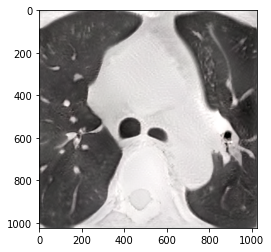

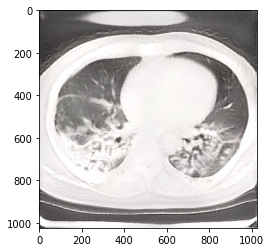

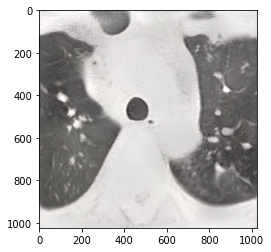

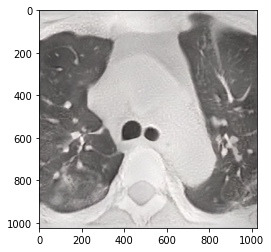

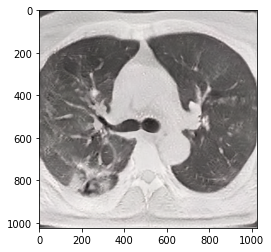

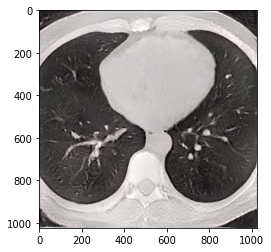

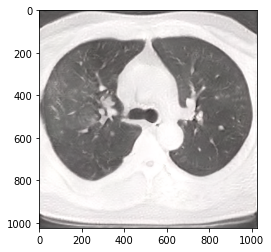

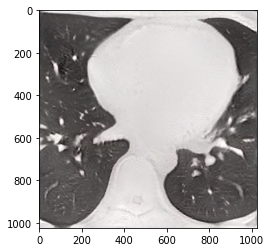

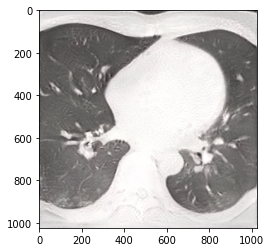

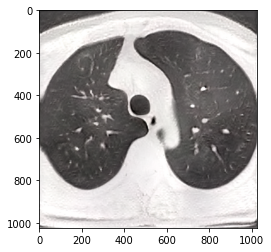

In [ ]:
# Display 10 randomly selected upscaled images
!rm /content/ESRGAN/results/baboon_ESRGAN.png   # remove autogenerated ESRGAN sample image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import random
from os import listdir

upscaled_image_path = '/content/ESRGAN/results'
images_list = []
for i in range(10):
  random_file=random.choice(listdir(upscaled_image_path))
  file_path = '/content/ESRGAN/results/' + random_file
  img=mpimg.imread(file_path)
  imgplot=plt.imshow(img)
  plt.show()